<a href="https://colab.research.google.com/github/GroverAruquipa/Works_Aprendizaje_estadistico_UBA/blob/main/Practice1_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Practica_1**

In [7]:
install.packages("googledrive")
library("googledrive")
install.packages("Hmisc")
library("Hmisc")

install.packages("corrplot")
library(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

corrplot 0.88 loaded



*1.- Calcular la matriz de correlacion*

In [4]:


mydata = read.csv("cemento.csv", header = TRUE, fileEncoding="latin1")
mydata.cor = cor(mydata)

In [5]:
mydata.rcorr = rcorr(as.matrix(mydata))
mydata.rcorr

      obs    x1    x2    x3    x4    x5     y
obs  1.00  0.31 -0.01  0.21 -0.30 -0.34  0.08
x1   0.31  1.00 -0.84 -0.24  0.14 -0.35 -0.64
x2  -0.01 -0.84  1.00  0.33 -0.34  0.34  0.76
x3   0.21 -0.24  0.33  1.00 -0.98  0.21  0.85
x4  -0.30  0.14 -0.34 -0.98  1.00 -0.22 -0.83
x5  -0.34 -0.35  0.34  0.21 -0.22  1.00  0.33
y    0.08 -0.64  0.76  0.85 -0.83  0.33  1.00

n= 14 


P
    obs    x1     x2     x3     x4     x5     y     
obs        0.2806 0.9663 0.4641 0.3002 0.2358 0.7894
x1  0.2806        0.0002 0.3995 0.6210 0.2176 0.0129
x2  0.9663 0.0002        0.2444 0.2306 0.2313 0.0014
x3  0.4641 0.3995 0.2444        0.0000 0.4636 0.0001
x4  0.3002 0.6210 0.2306 0.0000        0.4439 0.0002
x5  0.2358 0.2176 0.2313 0.4636 0.4439        0.2533
y   0.7894 0.0129 0.0014 0.0001 0.0002 0.2533       

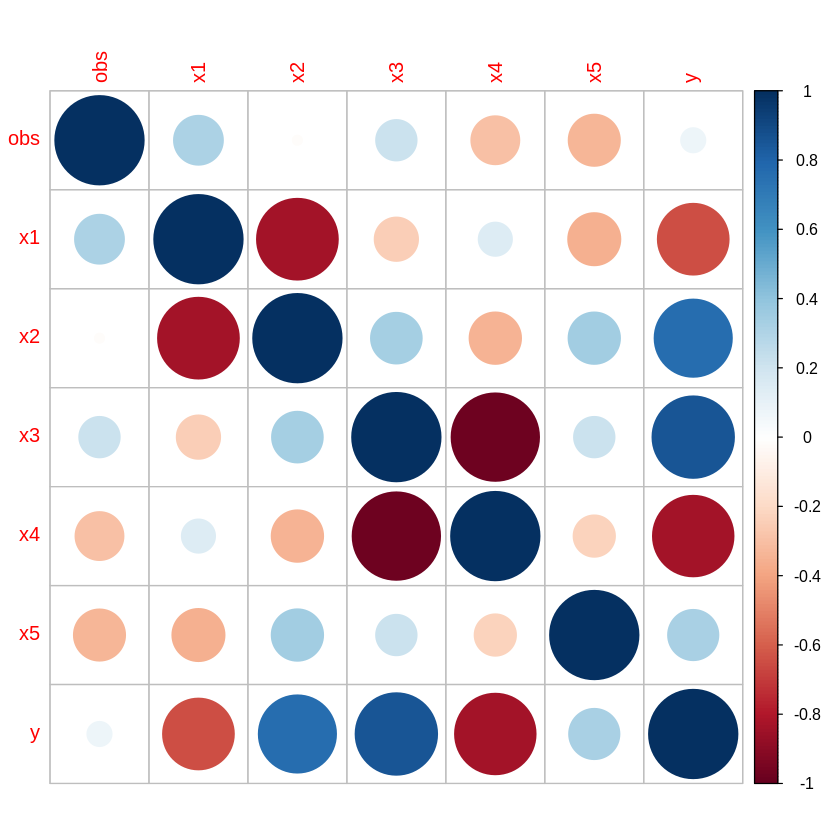

In [8]:
corrplot(mydata.cor)

*2.- MUltiple linear regression*

In [ ]:
a <- 42
A <- a * 2  # R is case sensitive
print(a)
cat(A, "\n") # "84" is concatenated with "\n"
if(A>a) # true, 84 > 42
{
  cat(A, ">", a, "\n")
} 

[1] 42
84 
84 > 42 


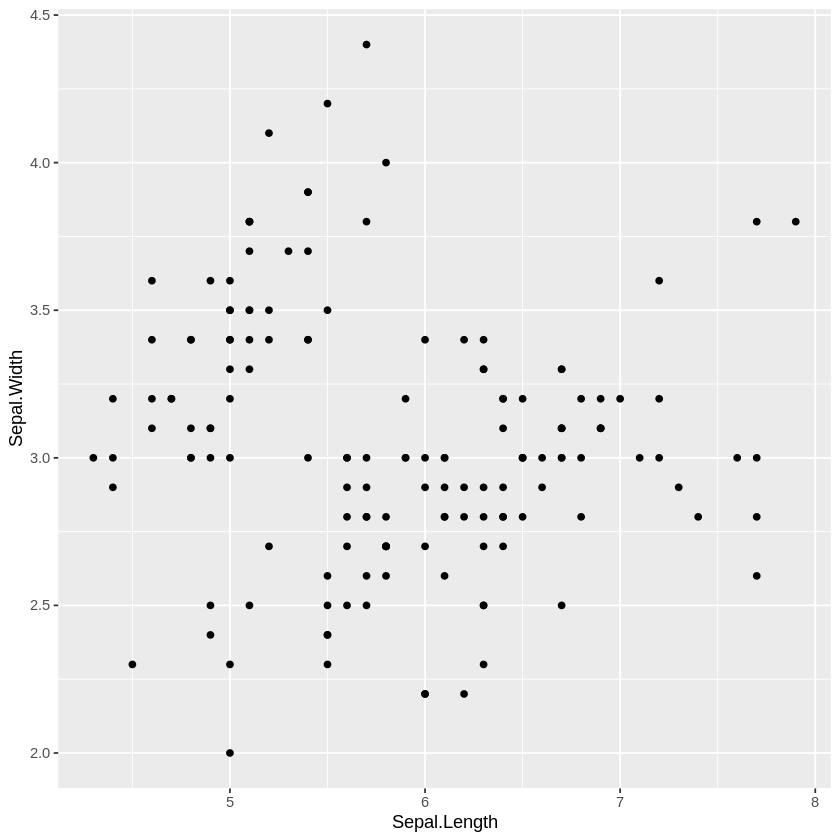

In [ ]:
# library
library(ggplot2)
 
# The iris dataset is provided natively by R
#head(iris)
 
# basic scatterplot
ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width)) + 
    geom_point()